# [ICTCOG AI Academy] 7기 고급시각저녁반
# Tensorflow를 활용한 기계학습/딥러닝 (3)

- binary class 이진 분류 
  - 2개인 경우 1개의 클래스로 분류
- multiclass 다중 분류
  - 3 개 이상인 경우 1개의 클래스로 분류
- multi label/output
  - 동시에 두개 이상으로 예측
- mult task


- regression은 classification에 활용 할 수 있다 
  - 아날로그 연속값 vs 디지털 이산값
    - 연속값을 쪼개면 이산값처럼 사용 가능
  
> - 신경망은 태생적으로 classification
  - 마지막 레이어의 유닛의 갯수에 따라 분류 가능 

 [Scikit-learn multiclass 참고](https://scikit-learn.org/stable/modules/multiclass.html)

In [9]:
from sklearn.datasets import load_boston, load_iris  #regression, classification

In [8]:
data=load_boston()
data.data.shape # X 506x13

(506, 13)

In [13]:
data.target    # y값 - boston 집값

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
data1=load_iris()
data1.data.shape

(150, 4)

In [12]:
import numpy as np
import tensorflow as tf

### tf.keras.models.Sequential
- keras 사용하는 3번째 유형
- 모델 자체는 합성함수

> 함수형 패러다임
  1. 함수 선언/정의
  2. 조합 활용

#### activation function 활성함수
- 딥러닝 성능 좋은 이유
- **비선형 함수**를 사용해서 선형 분리 가능하도록 데이터 공간 왜곡
  - 선형 모델은 XOR문제 해결 불가
- 레이어가 깊어질 수록 gradient vanishing 으로 인한 underfitting
[Colah's blog post](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)
  

#### argument 테크닉 3가지
1. 문자열
  - 디폴트 값 사용
2. 함수
  - 디폴트 값 바꾸기 가능
  - decorator 
3. 객체

> 3가지 방식 지원하지 않는 경우가 있음 
  - acativation 은 문자열, 함수만 존재

In [25]:
tf.keras.activations.relu

<function tensorflow.python.keras.activations.relu>

In [29]:
from functools import partial   
#함수형 패러다임
relu_v2= partial(tf.keras.activations.relu, alpha=1) #기본 값 변경
relu_v2

functools.partial(<function relu at 0x7f6fce37d048>, alpha=1)

In [30]:
#인자 테크닉
tf.keras.layers.Dense( 16 ,activation='relu')           #활성 함수 지정
tf.keras.layers.Dense( 16 ,activation= tf.keras.activations.relu) #함수 
tf.keras.layers.Dense( 16 ,activation= tf.nn.relu)      #함수 텐서플로우의 relu
tf.keras.layers.Activation('relu')                      #클래스 -> 레이어 개념으로 사용

'binarycrossentropy'                 #문자열
tf.keras.losses.binary_crossentropy  #함수
tf.keras.losses.BinaryCrossentropy   #클래스

tensorflow.python.keras.losses.BinaryCrossentropy

#### keras의 laeyrs는 2가지
#### 1. 이론
- activation 전후로 다른 것을 넣고자 할때
  - eg. batch normalization from ResNet
>  `tf.keras.layers.Dense(16), 
>  tf.keras.layers.BatchNormalization(),
>  tf.keras.layers.Activation('relu')`

#### 2. 구현 편의성
> `tf.keras.layers.Dense(16, input_shape=(13,),activation='relu')`

In [36]:
# 3 layers/ 2 hidden layers
model_boston= tf.keras.models.Sequential([
                            tf.keras.layers.Dense(16, input_shape=(13,),activation='relu') , #문자열
                            tf.keras.layers.Dense(16),           #함수
                            tf.keras.layers.Activation('relu'),  #클래스
                            tf.keras.layers.Dense(1 )            #regression-> output 1개 (변형x)

])

In [37]:
model_boston.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_boston.compile(loss='mse')                         #compile 학습 전략
model_boston.fit(boston.data, boston.target , epochs=2 ) #fit 학습

Epoch 1/2
16/16 [==============================] - 0s 1ms/step - loss: 1898.2325
Epoch 2/2
16/16 [==============================] - 0s 1ms/step - loss: 367.2814


각 레이어 별로 activation function
마지막 output


In [39]:
model_boston(boston.data)

<tf.Tensor: shape=(506, 1), dtype=float32, numpy=
array([[ 17.019976  ],
       [ 16.600845  ],
       [ 15.282056  ],
       [ 13.260794  ],
       [ 13.128686  ],
       [ 13.147584  ],
       [ 19.108627  ],
       [ 19.167967  ],
       [ 19.458279  ],
       [ 19.097897  ],
       [ 19.225563  ],
       [ 19.118023  ],
       [ 19.094635  ],
       [ 19.25844   ],
       [ 18.557377  ],
       [ 19.264168  ],
       [ 18.453354  ],
       [ 18.934023  ],
       [ 16.816395  ],
       [ 18.938581  ],
       [ 18.631004  ],
       [ 18.869068  ],
       [ 19.139076  ],
       [ 19.096394  ],
       [ 19.082632  ],
       [ 17.534914  ],
       [ 18.694183  ],
       [ 17.738602  ],
       [ 18.722172  ],
       [ 18.49425   ],
       [ 18.463448  ],
       [ 18.252064  ],
       [ 21.728382  ],
       [ 18.086077  ],
       [ 21.798016  ],
       [ 17.690811  ],
       [ 17.53206   ],
       [ 16.20176   ],
       [ 15.544013  ],
       [ 14.276149  ],
       [ 13.740951  ],
       

- regression도 binary classification 으로 변경 가능

In [43]:
model_boston= tf.keras.models.Sequential([
                            tf.keras.layers.Dense(16, input_shape=(13,),activation='relu') , #문자열
                            tf.keras.layers.Dense(16),           #함수
                            tf.keras.layers.Activation('relu'),  #클래스
                            tf.keras.layers.Dense(1, activation='sigmoid' ) #binary classification 

])
#sigmoid 함수 적용한 결과
model_boston(boston.data)

<tf.Tensor: shape=(506, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
 

In [46]:
model_boston= tf.keras.models.Sequential([
                            tf.keras.layers.Dense(16, input_shape=(13,),activation='relu') , #문자열
                            tf.keras.layers.Dense(16),           #함수
                            tf.keras.layers.Activation('relu'),  #클래스
                            tf.keras.layers.Dense(2, activation='softmax' ) #binary classification 

])
#softmax 함수 적용한 결과
model_boston(boston.data)

<tf.Tensor: shape=(506, 2), dtype=float32, numpy=
array([[1.0255241e-15, 1.0000000e+00],
       [8.6293221e-09, 1.0000000e+00],
       [9.2071950e-09, 1.0000000e+00],
       ...,
       [2.1974339e-12, 1.0000000e+00],
       [1.2615431e-12, 1.0000000e+00],
       [2.3876313e-12, 1.0000000e+00]], dtype=float32)>

- convolution 2d
  - 나중에 자세히 다룰 예정



In [ ]:
tf.keras.layers.Conv2D ( )

## 1단계


In [47]:
model_boston= tf.keras.models.Sequential([
                            tf.keras.layers.Dense(16, input_shape=(13,),activation='relu') , #문자열
                            tf.keras.layers.Dense(16),           #함수
                            tf.keras.layers.Activation('relu'),  #클래스
                            tf.keras.layers.Dense(1 )            #regression-> output 1개 (변형x)

])

In [51]:
model_boston(data.data).numpy() -data.target

array([[-167.49227905, -165.09227905, -178.19227905, ..., -167.39227905,
        -165.49227905, -155.39227905],
       [-148.29197693, -145.89197693, -158.99197693, ..., -148.19197693,
        -146.29197693, -136.19197693],
       [-146.25218201, -143.85218201, -156.95218201, ..., -146.15218201,
        -144.25218201, -134.15218201],
       ...,
       [-158.60009766, -156.20009766, -169.30009766, ..., -158.50009766,
        -156.60009766, -146.50009766],
       [-158.05776978, -155.65776978, -168.75776978, ..., -157.95776978,
        -156.05776978, -145.95776978],
       [-158.00535583, -155.60535583, -168.70535583, ..., -157.90535583,
        -156.00535583, -145.90535583]])

- 장점: 빠른 예측
  - predict 는 데이터 단순하게 모델에 입력
실시간 시스템에도 사용 가능
  - vectorization , GPU로 더 빠름
- 단점: 학습이 잘 안되고 느림
  - 리소스 필요
  - 데이터 양 , 컴퓨팅 파워(느린 학습 속도), 새로운 알고리즘
> KNN : case by learning :학습은 빠르나 예측 느림

In [52]:
model_boston.predict(data.data) == model_boston(data.data).numpy()

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

### back propagation
- 각 레이어의  kernel , bias 값 업데이트** 해서 최소화
 - 미분 chain rule


In [56]:
model_boston.layers[0].kernel, model_boston.layers[0].bias

(<tf.Variable 'dense_31/kernel:0' shape=(13, 16) dtype=float32, numpy=
 array([[ 0.03287032, -0.29305512, -0.35196158, -0.2432018 ,  0.1313588 ,
          0.38183022,  0.28721255,  0.35686076,  0.42332512,  0.31442666,
         -0.00515458, -0.2833883 , -0.14665845,  0.4255073 ,  0.43596935,
         -0.08507076],
        [-0.03233784,  0.2056086 , -0.12149501,  0.1427967 ,  0.36204857,
         -0.20503527, -0.35942653,  0.07042611, -0.07687315,  0.18337834,
         -0.0752303 ,  0.27389085,  0.3464499 , -0.40106565, -0.407713  ,
          0.18413204],
        [-0.24279861, -0.3812301 , -0.15177357,  0.22928774, -0.08626586,
         -0.1819618 ,  0.01652837, -0.22614671, -0.40516862,  0.16503453,
         -0.38903815, -0.10548761,  0.20473075,  0.27988625, -0.4494967 ,
         -0.36311945],
        [-0.15030488,  0.17578161,  0.02602366, -0.01945242,  0.05836803,
         -0.23231885, -0.3399164 , -0.30073553,  0.11305231,  0.01645377,
          0.39699042, -0.32896066,  0.45101768

## 2단계
### compile
- 학습 전략 
- 신경망 구성, 실제값 사용하도록 내부값 변화시킴
- 실제 사용하기 위해 변환 과정 필요했었으나 과정없이 연산했었음

- tf1: 컴파일 (빠름)
- pytorch, tf2  : 즉기 결과값 얻기 때문에 느림
    - JIT(Just In Time) 으로 최적화

#### loss
- feed forward 하여 최종 아웃풋인 예측값 y hat과 실제값 y 의 **차이를 최소화**
  - regression
    - MSE(Mean Squared Error)=  실제값 -예측값
- gradient descent 방식으로 최소점 찾음
  - 미분 가능한 함수
  > NFL 데이터에 따라 상황 상이하기 때문에 평가 통해 찾음

#### optimizer
  - optimizer 알고리즘 선택

In [58]:
model_boston.compile (loss= tf.keras.losses.mean_squared_error)
model_boston.compile (loss='mse')

In [ ]:
model_boston.compile (optimizer='adam')
model_boston.compile (optimizer=tf.keras.optimizers.Adam)

In [ ]:
tf.keras.optimizers.Adam

#### metrics
 - 성능 평가 척도
 예. 이상탐지인 경우 정확도는 동일하므로 정확도는 의미가 없으며 recall 이 더 유의미



In [ ]:
from sklearn.metrics import confusion_matrix # 상황에 맞는 성능 평가  ( accuracy, recall ,f1 score, roc curve)

In [59]:
# loss, optimizer, metrics 지정
model_boston.compile (loss='mse',optimizer='adam', metrics=['mse','mae'])

## 3단계
### fit
- 모델 학습
찾아야하는 weight,bias 많음
#### epoch 
- 전체 데이터를 여러번 학습 시키는 횟수
- 너무 많이하면 overfitting 되기 때문에 유의
  - early stopping

#### mini batch
- batch size 만큼 학습 후 웨이트 업데이트
  - batch size 가 작을수록 학습 속도는 느리나 정확도는 비교적 높음(적은 메모리)
  - batch size 가 클수록 학습 속도는 빠르나 정확도는 비교적 낮음 
  - 예. 1문제씩 보고 답보기 vs 30문제 보고 답보기
  - 1 문제씩 보고 답 풀면 틀린 부분은 덜 틀리게 되지만 속도가 느려짐
  - 
  

In [ ]:
model.fit
model.fit_generator  #Image에서 중요함
model.train_on_batch
model.train_step
model.train

In [60]:
model_boston.fit( boston.data, boston.target ) #X,y 필수

16/16 [==============================] - 0s 1ms/step - loss: 95.4573


In [64]:
model_boston.fit( boston.data, boston.target ,epochs=5) #loss 가 줄어들고 있음

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 176.8190 - mse: 176.8190 - mae: 10.4720
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 127.1570 - mse: 127.1570 - mae: 8.5635
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 104.2285 - mse: 104.2285 - mae: 7.6693
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 92.1737 - mse: 92.1737 - mae: 7.1260
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 86.6212 - mse: 86.6212 - mae: 6.8111


모델을 잘 못 만드는 경우 loss가 줄어들지 않음

### 이미지 데이터 이용한 신경망
[텐서플로 2.0 시작하기: 초보자용
](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko)
- 0~9 숫자 이미지 데이터 

In [66]:
#holdout
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


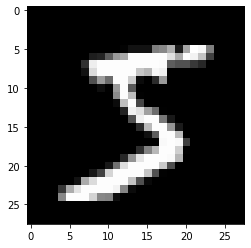

In [68]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray') #2차원 흑백데이터 (간단)

In [69]:
X_train.shape #Numpy 포맷 -> Tensorflow에 넣으면 Tensor로 호환됨(리소스)

(60000, 28, 28)

차원 변경

In [72]:
X_train_re =X_train.reshape(60000,-1) #2차원화 (6만, 784)

tf.keras.Sequential 은 aliasing


In [93]:
#3번째 유형 Sequential

model=tf.keras.models.Sequential([ 
                                  #이미지 데이터를 1차원
                                  tf.keras.layers.Dense( 128, input_shape=(28*28,), activation='relu'),
                                   tf.keras.layers.Dense( 64, activation='relu'),
                                   tf.keras.layers.Dense( 10) #10 클래스 분류
])

#### one-hot encoding

In [94]:
tf.keras.utils.to_categorical(y_train) #one-hot encoding

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [95]:
y_train_ohe= tf.keras.utils.to_categorical(y_train)

#### categorical_crossentropy
- one-hot encoding 된 경우

In [96]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam', metrics=['acc'])

In [97]:
model.fit(X_train_re , y_train_ohe, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 9.9306 - acc: 0.2089
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7918 - acc: 0.2025


In [98]:
y_train_ohe.shape

(60000, 10)

#### sparse_categorical_crossentropy
- label encoding인 경우

In [99]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam', metrics=['acc'])

In [100]:
model.fit(X_train_re , y_train, epochs=2) 

Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 8.6078 - acc: 0.1459
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 10.4005 - acc: 0.1262


### Predict

In [101]:
model.predict(X_test.reshape(10000,-1) )

array([[ 1422.5687, -2622.484 , -1084.2218, ...,  1213.7386,  -786.6462,
        -2283.829 ],
       [ 1794.9056, -3114.4846, -1418.9469, ...,  1430.1992, -1169.6106,
        -2652.1821],
       [ 1033.1715, -1396.0286, -1042.8071, ...,   810.2873,  -712.9575,
        -1455.4816],
       ...,
       [ 2266.9006, -4006.7124, -1673.5641, ...,  1817.6796, -1124.0057,
        -3546.2922],
       [ 1985.3179, -3200.0625, -1599.8854, ...,  1496.7762, -1268.4961,
        -2903.704 ],
       [ 2749.1091, -5804.501 , -1612.6287, ...,  2345.4148, -1773.743 ,
        -4854.3477]], dtype=float32)

In [102]:
model(X_test.reshape(10000,-1))


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[ 1422.5687, -2622.484 , -1084.2218, ...,  1213.7386,  -786.6462,
        -2283.829 ],
       [ 1794.9056, -3114.4846, -1418.9469, ...,  1430.1992, -1169.6106,
        -2652.1821],
       [ 1033.1715, -1396.0286, -1042.8071, ...,   810.2873,  -712.9575,
        -1455.4816],
       ...,
       [ 2266.9006, -4006.7124, -1673.5641, ...,  1817.6796, -1124.0057,
        -3546.2922],
       [ 1985.3179, -3200.0625, -1599.8854, ...,  1496.7762, -1268.4961,
        -2903.704 ],
       [ 2749.1091, -5804.501 , -1612.6287, ...,  2345.4148, -1773.743 ,
        -4854.3477]], dtype=float32)>

In [103]:
model.predict(X_test.reshape(10000,-1) )[0]

array([ 1422.5687, -2622.484 , -1084.2218, -1060.1813, -2510.3374,
        1096.0192, -1776.5771,  1213.7386,  -786.6462, -2283.829 ],
      dtype=float32)

#### softmax
- output layer의 결과값을 확률처럼 보여줌 (optional)

In [105]:
model=tf.keras.models.Sequential([ 
                                  #이미지 데이터를 1차원
                                  tf.keras.layers.Dense( 128, input_shape=(28*28,), activation='relu'),
                                   tf.keras.layers.Dense( 64, activation='relu'),
                                   tf.keras.layers.Dense( 10, activation='softmax') #10 클래스 분류
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam', metrics=['acc'])

model.fit(X_train_re , y_train_ohe, epochs=2) 

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6376 - acc: 0.7866
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3193 - acc: 0.9193


In [108]:
model.predict(X_test.reshape(10000,-1))[0] #해석이 쉬움

array([9.2635799e-10, 4.3180200e-05, 9.5204712e-07, 1.7464263e-06,
       7.4331770e-11, 5.0226449e-06, 1.3756730e-12, 9.9994886e-01,
       2.7057888e-07, 1.4547307e-08], dtype=float32)

In [110]:
np.argmax(model.predict(X_test.reshape(10000,-1))[0]) #7번째로 예측

7

### flatten
- 모델 자체에서 1차원화 
- 기존 데이터셋 변경 없이 바로 모델에 넣을 수 있어 편리함
- (6만, 28,28) -> (6만, 784)

In [115]:
model=tf.keras.models.Sequential([ 
                                  tf.keras.layers.Flatten(input_shape=(28,28) )
])

In [119]:
np.array_equal(model(X_train).numpy(),X_train_re ) #1차원한것과 동일함

True

In [112]:
#1단계
model=tf.keras.models.Sequential([ 
                                  tf.keras.layers.Flatten(input_shape=(28,28) ), #1차원화 
                                  tf.keras.layers.Dense( 128,  activation='relu'),
                                   tf.keras.layers.Dense( 64, activation='relu'),
                                   tf.keras.layers.Dense( 10, activation='softmax') #10 클래스 분류
])
#2단계
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam', metrics=['acc'])
#3단계 
model.fit(X_train , y_train_ohe, epochs=2)  

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 4.9663 - acc: 0.7903
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3363 - acc: 0.9156


- 상황마다 필요한 데이터 형태가 상이함
- end-to-end 모델 내에서 convolution연산 결과를 넘겨서 classifier에 붙임